In [127]:
import yelp_api_bounds
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import api_import 
import simplejson as json

###Lemma of the Day: "80% of Restaurants Close within 5 years"
http://www.businessinsider.com/new-york-restaurants-fail-rate-2011-8 <br>
80% of Restaurants Close within 5 years - worth considering getting opening/closing data!<br>
http://www.thedailybeast.com/articles/2014/10/28/high-rents-are-killing-the-restaurant-capital.html

In [158]:
#Load master dataframe
df = pd.read_json("../data/census_zillow_subway_data.json")
df.set_index(['COUNTY_ID', 'TRACT_ID'],inplace=True,drop=True)

In [159]:
df.head(5)

ALAND  ALAND_SQMI   AWATER  AWATER_SQMI BOROUGH  \
COUNTY_ID TRACT_ID                                                      
5         100       1672467       0.646  1032658        0.399   Bronx   
          200        455322       0.176   926899        0.358   Bronx   
          400        912391       0.352   602945        0.233   Bronx   
          1600       485079       0.187        0        0.000   Bronx   
          1900      1656134       0.639  1139660        0.440   Bronx   

                    FRAC_LAND        GEOID   INTPTLAT  INTPTLONG     LATMAX  \
COUNTY_ID TRACT_ID                                                            
5         100        0.618259  36005000100  40.793492 -73.883532  40.800898   
          200        0.329413  36005000200  40.803486 -73.860438  40.808779   
          400        0.602105  36005000400  40.808915 -73.850488  40.814458   
          1600       1.000000  36005001600  40.818848 -73.858076  40.821984   
          1900       0.592366  36005001900  40.800999 -73.909373  40.808528   

                           ...           pop_portuguese  pop_puertorican  \
COUNTY_ID TRACT_ID         ...                                             
5         100              ...                        7             1831   
          200              ...                        0             1618   
          400              ...                        0             2416   
          1600             ...                        0             1878   
          1900             ...                        0              547   

                    pop_russian pop_total  pop_vietnamese pop_white  \
COUNTY_ID TRACT_ID                                                    
5         100                39      9191               0      1361   
          200                 0      4858               0      1352   
          400                 0      5344               0      1339   
          1600                0      5215               0      1535   
          1900                3      2562               0       995   

                    transient_pop transient_residential_pop  \
COUNTY_ID TRACT_ID                                            
5         100            0.000000               9191.000000   
          200            0.000000               4858.000000   
          400            0.000000               5344.000000   
          1600           0.000000               5215.000000   
          1900         892.821429               3454.821429   

                    zillow_house_index  zillow_house_median  
COUNTY_ID TRACT_ID                                           
5         100                        0                    0  
          200                        0                    0  
          400                        0                    0  
          1600                       0                    0  
          1900                       0                    0  

[5 rows x 75 columns]

In [189]:
df.columns

Index([u'ALAND', u'ALAND_SQMI', u'AWATER', u'AWATER_SQMI', u'BOROUGH', u'FRAC_LAND', u'GEOID', u'INTPTLAT', u'INTPTLONG', u'LATMAX', u'LATMIN', u'LONGMAX', u'LONGMIN', u'STATE', u'STATE_ID', u'STATION', u'STATION_DISTANCE', u'USPS', u'ZIPCODE', u'hh1', u'hh10', u'hh2', u'hh3', u'hh4', u'hh5', u'hh6', u'hh7', u'hh8', u'hh9', u'hh_total', u'hhmean', u'hhmedian', u'house_index', u'house_median', u'median_owned', u'median_rent', u'pop1', u'pop10', u'pop11', u'pop12', u'pop13', u'pop2', u'pop3', u'pop4', u'pop5', u'pop6', u'pop7', u'pop8', u'pop9', u'pop_asian', u'pop_black', u'pop_chinese', u'pop_cuban', u'pop_filipino', u'pop_greek', u'pop_indpak', u'pop_irish', u'pop_italian', u'pop_japanese', u'pop_korean', u'pop_latino', u'pop_mexican', u'pop_native', u'pop_pacific', u'pop_polish', u'pop_portuguese', u'pop_puertorican', u'pop_russian', u'pop_total', u'pop_vietnamese', u'pop_white', u'transient_pop', u'transient_residential_pop', u'zillow_house_index', u'zillow_house_median', u'number_r

##Looking for Restaurant Information from http://www.yelp.com/biz/
<p><strong>Within query_api, save the unique restaurant-id and then append that to yelp.com/biz/ !!!</strong> </p>

##Keys associated with each business from API call
u'is_claimed': <br>
u'rating'<br>
u'mobile_url'<br>
u'rating_img_url'<br>
u'review_count'<br>
u'name'<br>
u'rating_img_url_small'<br>
u'url'<br>
u'is_closed'<br>
u'snippet_text'<br>
u'categories'<br>
u'rating_img_url_large'<br>
u'id'<br>
u'snippet_image_url'<br>
u'location'

##Searching By Category
The yelp categories are found here: 
https://www.yelp.com/developers/documentation/v2/all_category_list

In [160]:
def yelp_restaurant_categories(country="All"):
    with open("../data/yelp/categories.dat","r") as f:
        content = [x.strip('\n') for x in f.readlines()]
    
    category_dict = {}

    for item in content:
        words = item.split(",")
        cuisine_type = words[0]  #no need for strip() for name
        cuisine_category = words[1].strip()
        cuisine_language_support = words[2:]
        cuisine_language_support = [x.strip() for x in cuisine_language_support]
        if (country in cuisine_language_support) | ("All" in cuisine_language_support):
            category_dict[cuisine_category] = [cuisine_type, cuisine_language_support]
        
    return category_dict

In [161]:
yelp_categories = yelp_restaurant_categories(country="US")

In [162]:
yelp_categories_usa = [{x: y[0]} for x,y in yelp_categories.items()]
print yelp_categories_usa[:5]

[{'mexican': 'Mexican'}, {'chinese': 'Chinese'}, {'german': 'German'}, {'moroccan': 'Moroccan'}, {'russian': 'Russian'}]


In [163]:
for category in yelp_categories_usa[0:5]:
    print category.keys()[0]," : ",category.values()[0]

mexican  :  Mexican
chinese  :  Chinese
german  :  German
moroccan  :  Moroccan
russian  :  Russian


##YELP api calls are done using *.py file not here

In [156]:
#yelp_dict = {}
#for category_cuisine in category_cuisine_list:
#    yelp_dict[category_cuisine] = {}
#    count = 0.0
#    for irow, row in df.head(30).iterrows():
#        lat_min = row['LATMIN']
#        lat_max = row['LATMAX']
#        long_min = row['LONGMIN']
#        long_max = row['LONGMAX']
#        bounds_str = "{0:<11.6f},{1:<11.6f}|{2:<11.6f},{3:<11.6f}".format(lat_min,long_max,lat_max,long_min) 
#        bounds_str = bounds_str.replace(" ","")
#        yelp_dict[category_cuisine][row.GEOID] = yelp_api_bounds.query_api("restaurant", category_cuisine, bounds_str)
#        count += 1
#        if np.mod(count,10.) == 0:
#            print count,'...'

##Import and Extract Info from Yelp API Queries

In [164]:
with open("../data/yelp/yelp_api_data.json", 'r') as fp:
    yelp_dict = json.load(fp)

category_cuisine_list = yelp_dict.keys()
print yelp_dict.keys()

['puertorican', 'cuban', 'latin', 'mexican', 'chinese', 'vegetarian', 'indpak', 'japanese', 'greek', 'tradamerican', 'newamerican', 'italian']


In [165]:
#Add restaurant numbers to DF
#First, add features based on types of restaurants to be queried.
for category_cuisine in category_cuisine_list:
    df['number_restaurants_'+category_cuisine] = 0.0
    df['average_rating_restaurants_'+category_cuisine] = np.nan
    df['unweighed_average_rating_restaurants_'+category_cuisine] = np.nan
    df['closed_number_restaurants_'+category_cuisine] = 0.0
df.head(5)

ALAND  ALAND_SQMI   AWATER  AWATER_SQMI BOROUGH  \
COUNTY_ID TRACT_ID                                                      
5         100       1672467       0.646  1032658        0.399   Bronx   
          200        455322       0.176   926899        0.358   Bronx   
          400        912391       0.352   602945        0.233   Bronx   
          1600       485079       0.187        0        0.000   Bronx   
          1900      1656134       0.639  1139660        0.440   Bronx   

                    FRAC_LAND        GEOID   INTPTLAT  INTPTLONG     LATMAX  \
COUNTY_ID TRACT_ID                                                            
5         100        0.618259  36005000100  40.793492 -73.883532  40.800898   
          200        0.329413  36005000200  40.803486 -73.860438  40.808779   
          400        0.602105  36005000400  40.808915 -73.850488  40.814458   
          1600       1.000000  36005001600  40.818848 -73.858076  40.821984   
          1900       0.592366  36005001900  40.800999 -73.909373  40.808528   

                                  ...                  \
COUNTY_ID TRACT_ID                ...                   
5         100                     ...                   
          200                     ...                   
          400                     ...                   
          1600                    ...                   
          1900                    ...                   

                    unweighed_average_rating_restaurants_tradamerican  \
COUNTY_ID TRACT_ID                                                      
5         100                                                     NaN   
          200                                                     NaN   
          400                                                     NaN   
          1600                                                    NaN   
          1900                                                    NaN   

                    closed_number_restaurants_tradamerican  \
COUNTY_ID TRACT_ID                                           
5         100                                            0   
          200                                            0   
          400                                            0   
          1600                                           0   
          1900                                           0   

                    number_restaurants_newamerican  \
COUNTY_ID TRACT_ID                                   
5         100                                    0   
          200                                    0   
          400                                    0   
          1600                                   0   
          1900                                   0   

                   average_rating_restaurants_newamerican  \
COUNTY_ID TRACT_ID                                          
5         100                                         NaN   
          200                                         NaN   
          400                                         NaN   
          1600                                        NaN   
          1900                                        NaN   

                    unweighed_average_rating_restaurants_newamerican  \
COUNTY_ID TRACT_ID                                                     
5         100                                                    NaN   
          200                                                    NaN   
          400                                                    NaN   
          1600                                                   NaN   
          1900                                                   NaN   

                   closed_number_restaurants_newamerican  \
COUNTY_ID TRACT_ID                                         
5         100                                          0   
          200                                          0   
          400                                          0 

In [166]:
for category_cuisine in category_cuisine_list:
    for (key,value) in yelp_dict[category_cuisine].items():
        scores = []
        weights = []
        closed_biz = 0.0
        open_biz = 0.0
        if len(value) > 0:
            for j in range(len(value)):
                if value[j]['is_closed'] == False:
                    #print "open!"
                    scores.append(float(value[j]['rating']))
                    weights.append(float(value[j]['review_count']))
                    open_biz += 1
                elif value[j]['is_closed'] == True:
                    #print "closed!"
                    closed_biz += 1
            scores = np.array(scores)
            weights = np.array(weights)
            weighed_score = np.average(scores, weights = weights)
            unweighed_score = np.average(scores)
            #print key, open_biz, type(key), type(open_biz), type(df.ix[:,"GEOID"])
            df.loc[df["GEOID"].astype(str) == key,"number_restaurants_"+category_cuisine] = open_biz
            df.loc[df["GEOID"].astype(str) == key,"closed_number_restaurants_"+category_cuisine] = closed_biz
            df.loc[df["GEOID"].astype(str) == key,"average_rating_restaurants_"+category_cuisine] = weighed_score
            df.loc[df["GEOID"].astype(str) == key,"unweighed_average_rating_restaurants_"+category_cuisine] = unweighed_score
            #print float(value[0]['rating']),float(value[0]['review_count'])

open!
36047044300 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36061002601 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36047044500 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36005009200 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36061019600 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36061003400 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36061002100 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36061019400 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36061004400 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36061016200 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36061013300 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36061002800 1.0 <type 'str'> <type 'float'> <cla

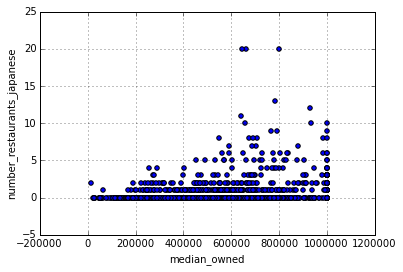

In [191]:
df.plot(kind="scatter",x="median_owned",y="number_restaurants_japanese")

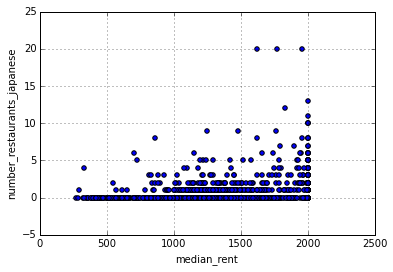

In [192]:
df.plot(kind="scatter",x="median_rent",y="number_restaurants_japanese")

In [193]:
df.loc[:,["ZIPCODE","INTPTLONG","INTPTLAT","number_restaurants_chinese","number_restaurants_mexican","average_rating_restaurants_mexican"]]

ZIPCODE  INTPTLONG   INTPTLAT  number_restaurants_chinese  \
COUNTY_ID TRACT_ID                                                              
5         100         11370 -73.883532  40.793492                           0   
          200         10473 -73.860438  40.803486                           0   
          400         10473 -73.850488  40.808915                           0   
          1600        10473 -73.858076  40.818848                           0   
          1900        10455 -73.909373  40.800999                           5   
          2000        10473 -73.866096  40.817580                           1   
          2300        10454 -73.925844  40.809082                           1   
          2400        10473 -73.871112  40.815753                           0   
          2500        10454 -73.920875  40.807003                           0   
          2701        10454 -73.916337  40.805064                           0   
          2702        10454 -73.913737  40.806437                           2   
          2800        10473 -73.878234  40.822518                           0   
          3100        10455 -73.905695  40.809876                           0   
          3300        10454 -73.911925  40.808223                           1   
          3500        10455 -73.908670  40.810965                           0   
          3700        10455 -73.912187  40.811442                           0   
          3800        10473 -73.863343  40.820295                           0   
          3900        10454 -73.921426  40.809722                           1   
          4001        10472 -73.858335  40.828272                           0   
          4100        10454 -73.919410  40.811386                           0   
          4200        10473 -73.862007  40.823931                           0   
          4300        10455 -73.917038  40.813621                           0   
          4400        10472 -73.866414  40.826515                           0   
          4600        10473 -73.869178  40.822419                           0   
          4800        10472 -73.874304  40.827017                           0   
          5001        10472 -73.877853  40.824997                           0   
          5002        10472 -73.878435  40.827363                           0   
          5100        10454 -73.927580  40.813206                           1   
          5200        10472 -73.882433  40.825629                           0   
          5300        10453 -73.922646  40.851434                           0   
...                     ...        ...        ...                         ...   
85        20801       10312 -74.209528  40.548656                           2   
          20803       10309 -74.210667  40.532820                           0   
          20804       10312 -74.199533  40.535804                           0   
          21300       10303 -74.138903  40.632616                           2   
          22300       10303 -74.151405  40.640901                           0   
          22600       10309 -74.230812  40.539521                           1   
          22800       10314 -74.186741  40.575224                           2   
          23100       10303 -74.156321  40.630124                           0   
          23900       10303 -74.149331  40.629540                           0   
          24401       10309 -74.238618  40.508673                           0   
          24402       10309 -74.238471  40.499787                           0   
          24700       10303 -74.141797  40.627509                           2   
          24800       10309 -74.243439  40.517492                           2   
          25100       10314 -74.146033  40.618041                           0   
          27301       10314 -74.152872  40.600080                           1   
          27302       10314 -74.138732  40.595558                           0   
          27702       10314 -74.163645  40.580089  

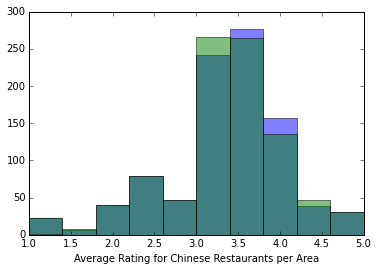

In [194]:
n, bins, patches = plt.hist(df[~np.isnan(df["average_rating_restaurants_chinese"])]["average_rating_restaurants_chinese"],alpha=0.5)
plt.hist(df[~np.isnan(df["unweighed_average_rating_restaurants_chinese"])]["unweighed_average_rating_restaurants_chinese"],bins=bins,alpha=0.5)
plt.xlabel("Average Rating for Chinese Restaurants per Area")

In [196]:
#Save dataframe
df.reset_index().to_json("../data/census_zillow_subway_yelp_data.json")

(2, 2)